In [575]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 4  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import snow forecast data from snowforecast.com

In [777]:
df_for = pd.DataFrame.from_csv('data/wp_snow_13_14.csv', index_col = 5, parse_dates=True)

###### Put the data in chronological order

In [778]:
df_for.sort_index(inplace=True)

##### Make a column with the month and day, but no year.

In [779]:
df_for['mon_day'] = [str(dt.month) + '/' + str(dt.day) for dt in df_for.index]

In [780]:
df_for.head()

,new_24,basedepth,open_trails,open_lifts,open_percent,mon_day
valid_at,,,,,,
2013-11-15 07:11:00,0.0,18,3,3,3,11/15
2013-11-16 05:48:00,3.5,18,3,3,0,11/16
2013-11-16 05:48:00,4.0,18,3,3,3,11/16
2013-11-17 05:44:00,12.0,24,3,3,0,11/17
2013-11-17 05:44:00,12.0,24,3,3,3,11/17


In [781]:
df_for = df_for[df_for.open_percent != 0]

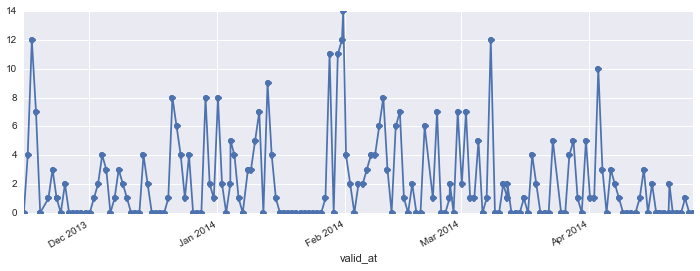

In [782]:
df_for.new_24.plot(marker = 'o')

In [783]:
df_for.tail()

,new_24,basedepth,open_trails,open_lifts,open_percent,mon_day
valid_at,,,,,,
2014-04-22 05:41:00,0,77,112,8,79,4/22
2014-04-23 05:55:00,0,77,112,9,79,4/23
2014-04-24 05:45:00,1,91,112,9,79,4/24
2014-04-25 05:40:00,0,75,101,8,71,4/25
2014-04-26 05:43:00,0,75,95,8,67,4/26


In [766]:
df_for = find_season_total_snowfall(df_for)

In [767]:
df_for['week_snow_tot'] = find_lag_integral(df_for, 7, 'new_24')
df_for['2day_snow_tot'] = find_lag_integral(df_for, 2, 'new_24')
df_for['3day_snow_tot'] = find_lag_integral(df_for, 3, 'new_24')
df_for['4day_snow_tot'] = find_lag_integral(df_for, 4, 'new_24')
df_for['5day_snow_tot'] = find_lag_integral(df_for, 5, 'new_24')
df_for['6day_snow_tot'] = find_lag_integral(df_for, 6, 'new_24')

In [768]:
df_for.head()

,new_24,basedepth,open_trails,open_lifts,open_percent,mon_day,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
valid_at,,,,,,,,,,,,,
2013-11-15 07:11:00,0,18,3,3,3,11/15,0,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-16 05:48:00,4,18,3,3,3,11/16,4,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-17 05:44:00,12,24,3,3,3,11/17,16,NaN,4,NaN,NaN,NaN,NaN
2013-11-18 05:51:00,7,18,3,3,3,11/18,23,NaN,16,16,NaN,NaN,NaN
2013-11-19 06:11:00,0,18,10,3,2,11/19,23,NaN,19,23,23,NaN,NaN


## Save snowfall data.

In [769]:
df_for.to_csv('data/clean_wp_13_14.csv')

# Combine all of the years and make a dataframe for next year

In [932]:
df_11_12 = pd.DataFrame.from_csv('../data_ski_in_solitude/clean_wp_11_12.csv')
df_12_13 = pd.DataFrame.from_csv('../data_ski_in_solitude/clean_wp_12_13.csv')
df_13_14 = pd.DataFrame.from_csv('../data_ski_in_solitude/clean_wp_13_14.csv')
df_14_15 = pd.DataFrame.from_csv('../data_ski_in_solitude/clean_wp_14_15.csv')

In [933]:
df_all = df_11_12.append(df_12_13.append(df_13_14.append(df_14_15)))

In [934]:
df_daily_means = df_all.groupby('mon_day').mean()

In [935]:
df_daily_means.drop(['tot_snow', 'week_snow_tot', '2day_snow_tot', '3day_snow_tot', '4day_snow_tot', '5day_snow_tot', '6day_snow_tot', 'new_24'], inplace=True, axis=1)

In [936]:
df_daily_means.head()

,basedepth,open_trails,open_lifts,open_percent
mon_day,,,,
1/1,40.25,106.75,20.50,64.75
1/10,41.25,113.75,19.75,67.75
1/11,42.25,115.50,20.75,68.75
1/12,44.75,117.00,20.25,69.75
1/13,45.25,117.75,18.75,68.75


#### Set 10-year monthly snowfall average variables. (Source: http://www.winterparkresort.com/the-mountain/mountain-stats-and-history/weather-history.aspx)

In [937]:
daily_avg_snow = {11: 38.8/30, 12: 62.3/31, 1: 53.2/31, 2: 61.1/28, 3: 50.6/31, 4: 41.6/30}

In [938]:
df_next_year = pd.DataFrame({'date':[datetime.datetime(2015,11,15) + datetime.timedelta(days=x) for x in range(0, 164)]})

In [939]:
df_next_year['new_24'] = [round(daily_avg_snow[date.month],1) for date in df_next_year.date]

In [940]:
df_next_year = find_season_total_snowfall(df_next_year)

In [941]:
df_next_year['week_snow_tot'] = find_lag_integral(df_next_year, 7, 'new_24')
df_next_year['2day_snow_tot'] = find_lag_integral(df_next_year, 2, 'new_24')
df_next_year['3day_snow_tot'] = find_lag_integral(df_next_year, 3, 'new_24')
df_next_year['4day_snow_tot'] = find_lag_integral(df_next_year, 4, 'new_24')
df_next_year['5day_snow_tot'] = find_lag_integral(df_next_year, 5, 'new_24')
df_next_year['6day_snow_tot'] = find_lag_integral(df_next_year, 6, 'new_24')

In [942]:
df_next_year.head()

,date,new_24,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
0,2015-11-15,1.3,1.3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-16,1.3,2.6,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-17,1.3,3.9,NaN,2.6,NaN,NaN,NaN,NaN
3,2015-11-18,1.3,5.2,NaN,2.6,3.9,NaN,NaN,NaN
4,2015-11-19,1.3,6.5,NaN,2.6,3.9,5.2,NaN,NaN


In [943]:
df_next_year['mon_day'] = [str(dt.month) + '/' + str(dt.day) for dt in df_next_year.date]
df_next_year.set_index('mon_day', inplace=True)

In [944]:
df_next_year = pd.concat([df_daily_means, df_next_year], axis=1, join='inner')

In [945]:
df_next_year.head()

,basedepth,open_trails,open_lifts,open_percent,date,new_24,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
mon_day,,,,,,,,,,,,,
11/15,18.0,2.50,2.25,2.25,2015-11-15,1.3,1.3,NaN,NaN,NaN,NaN,NaN,NaN
11/16,18.0,3.00,2.50,2.50,2015-11-16,1.3,2.6,NaN,NaN,NaN,NaN,NaN,NaN
11/17,19.5,3.25,2.50,2.75,2015-11-17,1.3,3.9,NaN,2.6,NaN,NaN,NaN,NaN
11/18,18.0,3.75,2.50,2.00,2015-11-18,1.3,5.2,NaN,2.6,3.9,NaN,NaN,NaN
11/19,18.0,6.60,2.60,2.80,2015-11-19,1.3,6.5,NaN,2.6,3.9,5.2,NaN,NaN


In [946]:
df_next_year.set_index('date', inplace=True)

In [952]:
df_next_year.to_csv('../data_ski_in_solitude/2015_snowfall.csv')

# Plots

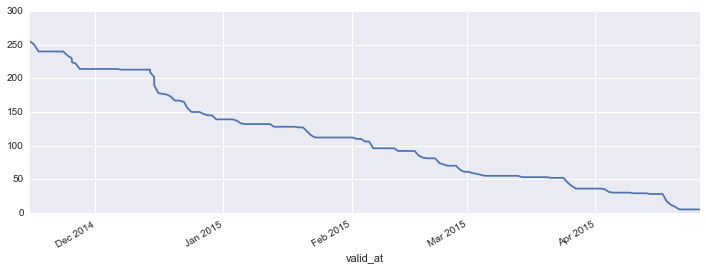

In [502]:
df_for.tot_snow.plot()

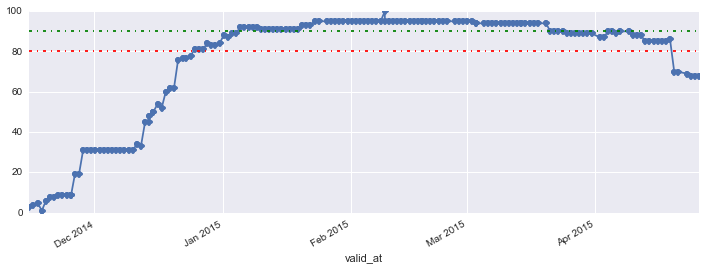

In [501]:
df_for.open_percent.plot(linestyle='-', marker='o')
plt.axhline(y = 80, color = 'r', linestyle = '-.')
plt.axhline(y = 90, color = 'g', linestyle = '-.')

# Import Weather Data

In [361]:
df_met = pd.DataFrame.from_csv('data/berthoud_met.csv', index_col = 1, parse_dates = True)

In [362]:
df_met.head()

,WBAN,Time,StationType,SkyCondition,SkyConditionFlag,Visibility,VisibilityFlag,WeatherType,WeatherTypeFlag,DryBulbFarenheit,...,PressureChange,PressureChangeFlag,SeaLevelPressure,SeaLevelPressureFlag,RecordType,RecordTypeFlag,HourlyPrecip,HourlyPrecipFlag,Altimeter,AltimeterFlag
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,419,10,0,CLR,,10.00,,,,32,...,,,M,,AA,,,,30.36,
2014-11-01,419,30,0,CLR,,10.00,,,,32,...,,,M,,AA,,,,30.35,
2014-11-01,419,50,0,CLR,,10.00,,,,32,...,,,M,,AA,,,,30.35,
2014-11-01,419,110,0,CLR,,10.00,,,,32,...,,,M,,AA,,,,30.34,
2014-11-01,419,130,0,CLR,,10.00,,,,32,...,,,M,,AA,,,,30.35,


In [363]:
df_met.drop(['WBAN',  
 'StationType', 
 'DryBulbFarenheit',
 'DryBulbFarenheitFlag',
 'DewPointFarenheit',
 'DewPointFarenheitFlag',
 'DewPointCelsius',
 'DewPointCelsiusFlag', 
 'WindDirection',
 'WindDirectionFlag',
 'ValueForWindCharacter',
 'ValueForWindCharacterFlag',
 'StationPressure',
 'StationPressureFlag',
 'PressureTendency',
 'PressureTendencyFlag',
 'PressureChange',
 'PressureChangeFlag',
 'SeaLevelPressure',
 'SeaLevelPressureFlag',
 'RecordType',
 'RecordTypeFlag',
 'Altimeter',
 'AltimeterFlag', 
 'DryBulbCelsiusFlag', 
 'WetBulbFarenheit', 
 'WetBulbFarenheitFlag', 
 'WetBulbCelsius'], inplace = True, axis=1)

In [364]:
df_met.head()

,Time,SkyCondition,SkyConditionFlag,Visibility,VisibilityFlag,WeatherType,WeatherTypeFlag,DryBulbCelsius,WetBulbCelsiusFlag,RelativeHumidity,RelativeHumidityFlag,WindSpeed,WindSpeedFlag,HourlyPrecip,HourlyPrecipFlag
Date,,,,,,,,,,,,,,,
2014-11-01,10,CLR,,10.00,,,,0,,85,,23,,,
2014-11-01,30,CLR,,10.00,,,,0,,85,,25,,,
2014-11-01,50,CLR,,10.00,,,,0,,85,,23,,,
2014-11-01,110,CLR,,10.00,,,,0,,92,,29,,,
2014-11-01,130,CLR,,10.00,,,,0,,92,,25,,,


In [366]:
df_met = df_met[df_met.SkyConditionFlag != 's']
df_met = df_met[df_met.VisibilityFlag != 's']
df_met = df_met[df_met.WeatherTypeFlag != 's']
df_met = df_met[df_met.RelativeHumidityFlag != 's']
df_met = df_met[df_met.WetBulbCelsiusFlag != 's']
df_met = df_met[df_met.WindSpeedFlag != 's']
df_met = df_met[df_met.HourlyPrecipFlag  != 's']

In [368]:
df_met.drop(['SkyConditionFlag', 'VisibilityFlag', 'WeatherTypeFlag','WetBulbCelsiusFlag',
             'RelativeHumidityFlag', 'WindSpeedFlag','HourlyPrecipFlag'], inplace = True, axis=1)

In [369]:
df_met.head()

,Time,SkyCondition,Visibility,WeatherType,DryBulbCelsius,RelativeHumidity,WindSpeed,HourlyPrecip
Date,,,,,,,,
2014-11-01,10,CLR,10.00,,0,85,23,
2014-11-01,30,CLR,10.00,,0,85,25,
2014-11-01,50,CLR,10.00,,0,85,23,
2014-11-01,110,CLR,10.00,,0,92,29,
2014-11-01,130,CLR,10.00,,0,92,25,


## Weather Type

In [370]:
df_met.WeatherType.unique()

array([' ', 'VCTS', 'TS', 'FZFG', '+SN', '-SN', 'BR', 'VCTS BR', 'TSSN',
       'VCTSSN', 'SN', 'HZ', '-TSSN', '+TSSN', 'TSHZ', 'VCTSHZ'], dtype=object)

In [371]:
df_met['freezing_fog'] = df_met.WeatherType.map(lambda weather: 1 if weather == 'FZFG' else 0)
df_met['heavy_snow'] = df_met.WeatherType.map(lambda weather: 1 if weather == '+SN' else 0)
df_met['light_snow'] = df_met.WeatherType.map(lambda weather:1 if weather == 'SN' or weather == '-SN' else 0)
df_met['mist'] = df_met.WeatherType.map(lambda weather: 1 if weather == 'BR' or weather == 'HZ' else 0)
df_met['thunderstorm_haze'] = df_met.WeatherType.map(lambda weather: 1 if weather == 'VCTS BR' or weather == 'TSHZ' or weather == 'VCTSHZ' or weather == 'TS'else 0)
df_met['thunderstorm_snow'] = df_met.WeatherType.map(lambda weather: 1 if weather == 'TSSN' or weather == 'VCTSSN' or weather == '-TSSN' else 0)

In [372]:
df_met.head()

,Time,SkyCondition,Visibility,WeatherType,DryBulbCelsius,RelativeHumidity,WindSpeed,HourlyPrecip,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow
Date,,,,,,,,,,,,,,
2014-11-01,10,CLR,10.00,,0,85,23,,0,0,0,0,0,0
2014-11-01,30,CLR,10.00,,0,85,25,,0,0,0,0,0,0
2014-11-01,50,CLR,10.00,,0,85,23,,0,0,0,0,0,0
2014-11-01,110,CLR,10.00,,0,92,29,,0,0,0,0,0,0
2014-11-01,130,CLR,10.00,,0,92,25,,0,0,0,0,0,0


In [373]:
df_met.drop(['WeatherType'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127d57fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a297f90>]], dtype=object)

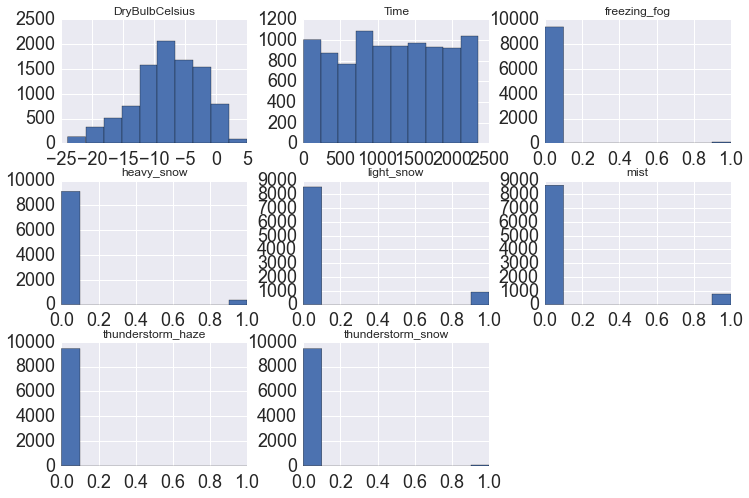

In [374]:
df_met.hist()

## Sky Condition

In [375]:
df_met.SkyCondition.unique()

array(['CLR', 'SCT085', 'BKN090', ..., 'BKN060 BKN080', 'SCT060 BKN070',
       'SCT022 BKN080 BKN110'], dtype=object)

In [376]:
df_met['clear_sky'] = df_met.SkyCondition.map(lambda cond: 1 if cond == 'CLR' else 0)
df_met['broken_sky'] = df_met.SkyCondition.map(lambda cond: 1 if cond[0:3] == 'BKN' else 0)
df_met['scattered_sky'] = df_met.SkyCondition.map(lambda cond: 1 if cond[0:3] == 'SCT' else 0)
df_met['overcast'] = df_met.SkyCondition.map(lambda cond: 1 if cond[0:3] == 'OVC' else 0)

In [377]:
df_met.drop(['SkyCondition'], axis = 1, inplace=True)

In [378]:
df_met.head()

,Time,Visibility,DryBulbCelsius,RelativeHumidity,WindSpeed,HourlyPrecip,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,overcast
Date,,,,,,,,,,,,,,,,
2014-11-01,10,10.00,0,85,23,,0,0,0,0,0,0,1,0,0,0
2014-11-01,30,10.00,0,85,25,,0,0,0,0,0,0,1,0,0,0
2014-11-01,50,10.00,0,85,23,,0,0,0,0,0,0,1,0,0,0
2014-11-01,110,10.00,0,92,29,,0,0,0,0,0,0,1,0,0,0
2014-11-01,130,10.00,0,92,25,,0,0,0,0,0,0,1,0,0,0


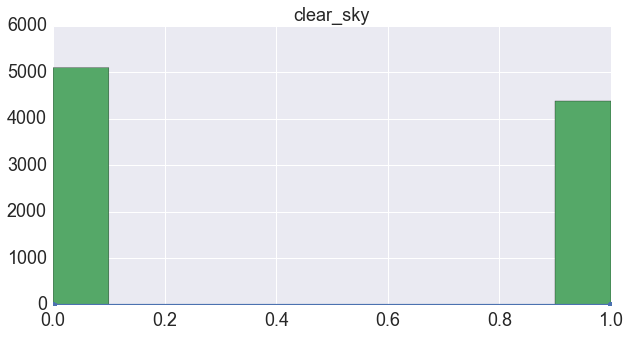

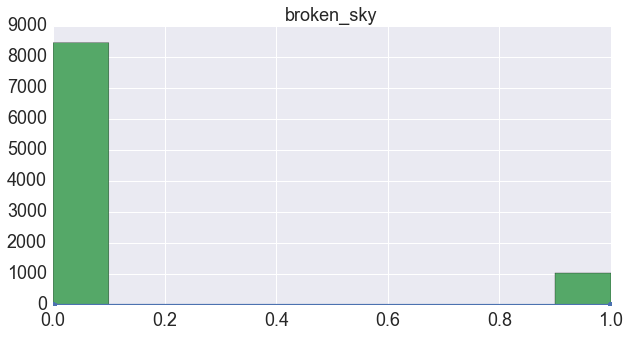

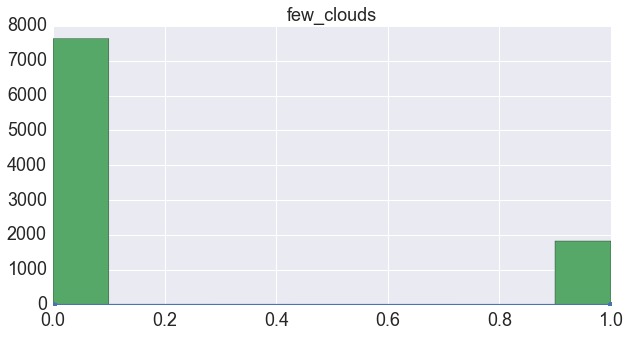

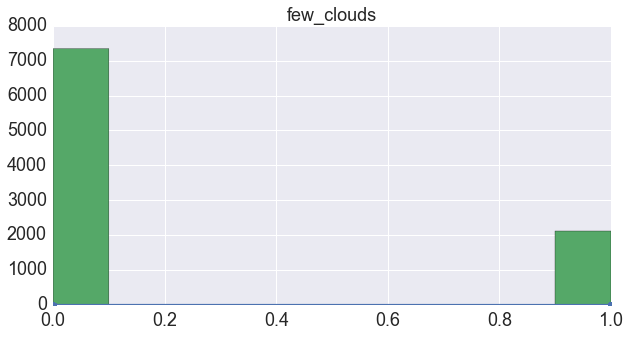

In [379]:
plot_hist(df_met['clear_sky'].values, 'clear_sky')
plot_hist(df_met['broken_sky'].values, 'broken_sky')
plot_hist(df_met['scattered_sky'].values, 'few_clouds')
plot_hist(df_met['overcast'].values, 'few_clouds')

## Visibility

In [380]:
df_met.Visibility.unique()

array(['10.00', ' 0.00', ' 0.25', ' 1.00', ' 0.50', ' 3.00', ' 7.00',
       ' 5.00', ' 2.00', 'M', ' 1.50', ' 4.00', ' 0.75', ' 2.50', ' 1.75',
       ' 1.25'], dtype=object)

In [381]:
df_met.Visibility = df_met.Visibility.map(lambda x: np.nan if x == 'M' else x).astype(float)

In [382]:
df_met.Visibility.unique()

array([ 10.  ,   0.  ,   0.25,   1.  ,   0.5 ,   3.  ,   7.  ,   5.  ,
         2.  ,    nan,   1.5 ,   4.  ,   0.75,   2.5 ,   1.75,   1.25])

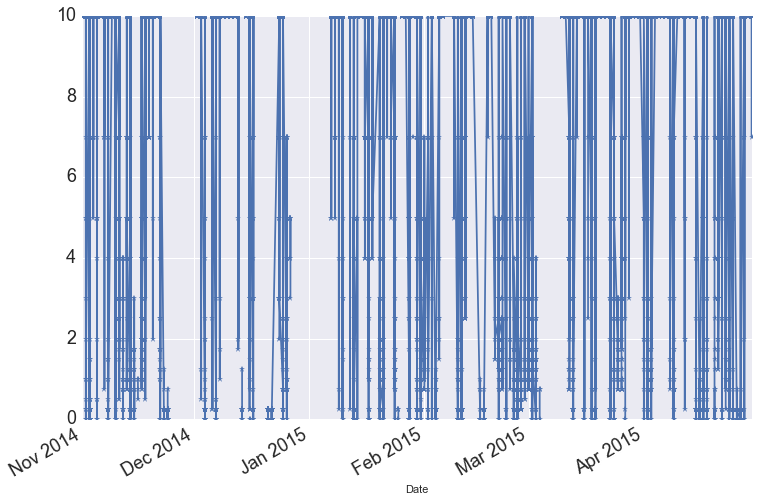

In [383]:
df_met.Visibility.plot(linestyle = '-', marker = '*')

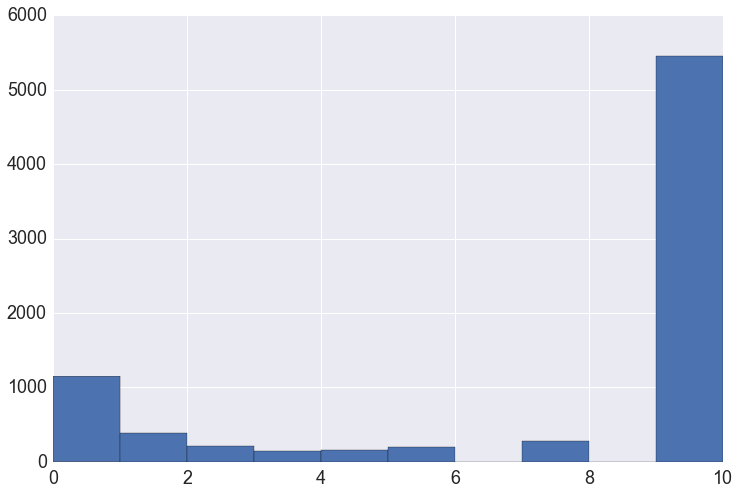

In [384]:
df_met.Visibility.hist()

In [422]:
df_met['mean_visibility'] = df_met.Visibility.resample(resamp_time)

In [423]:
df_met.drop(['Visibility'], axis=1, inplace=True)

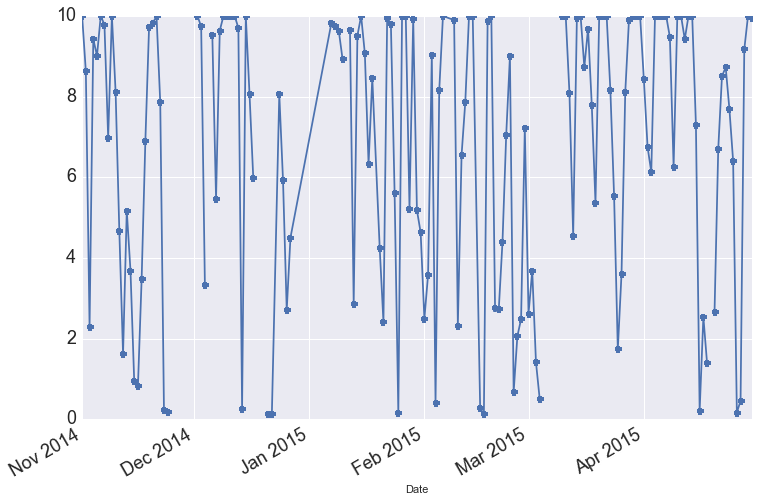

In [426]:
df_met.mean_visibility.plot(marker='o')

## Precipitation 

In [385]:
#change empty strings to zeroes and datatype to floats
df_met.HourlyPrecip = df_met.HourlyPrecip.map(lambda x: '0.' if x == ' ' else x).astype(float)

In [386]:
df_met.HourlyPrecip.unique()

array([ 0.  ,  0.02,  0.01,  0.07,  0.1 ,  0.04,  0.06,  0.03,  0.05,
        0.11,  0.19,  0.09,  0.59,  0.13])

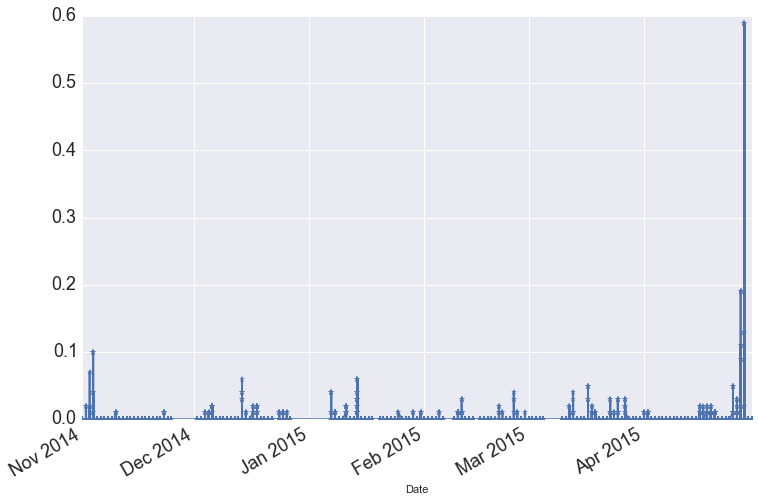

In [387]:
df_met.HourlyPrecip.plot(linestyle = '-', marker = '*')

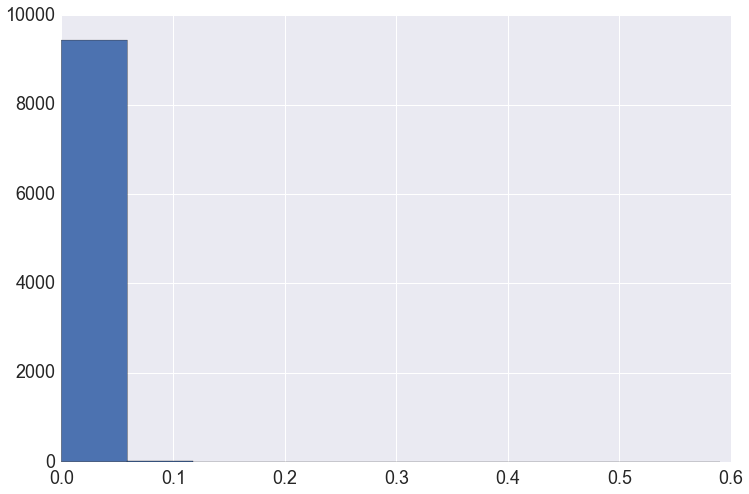

In [388]:
df_met.HourlyPrecip.hist()

#### Resample precipitation to sum daily.

In [389]:
resamp_time = '1440Min'
df_met['snowfall'] = df_met.HourlyPrecip.resample(resamp_time, how=sum)

In [390]:
df_met.snowfall.unique()

array([ 0.  ,  0.06,  0.14,  0.45,  0.04,  0.05,  0.03,  0.21,  0.27,
        0.1 ,  0.18,  0.06,  0.02,  0.09,  0.18,  0.63,  0.14,  0.07,
        0.11,  0.01,  0.13,  0.24,  0.12,  0.12,  0.17,  0.15,  0.19,
        0.22,  0.22,  1.17,  2.22])

In [391]:
df_met.drop(['HourlyPrecip'], axis=1, inplace=True)

## Temperature

In [392]:
df_met.DryBulbCelsius.unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,  -1.,  -2.,  -4.,  -3.,  -5.,
        -6.,  -7.,  -8., -10., -11.,  -9., -12., -13., -14., -15., -16.,
       -17., -20., -19., -18., -21., -22., -23., -24.])

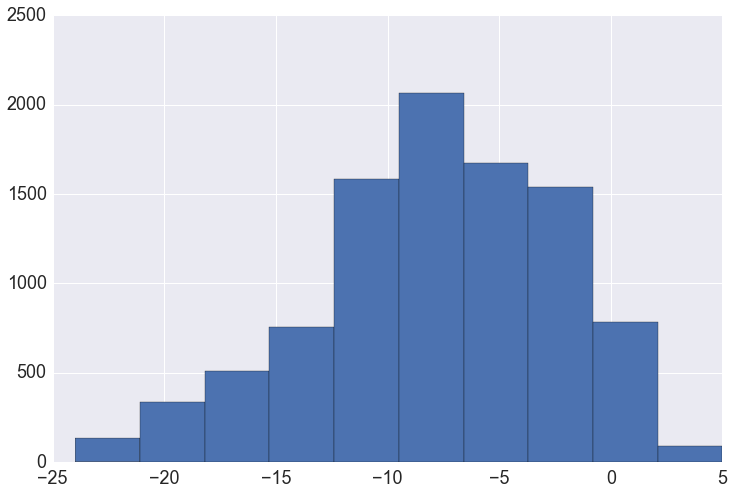

In [393]:
df_met.DryBulbCelsius.hist()

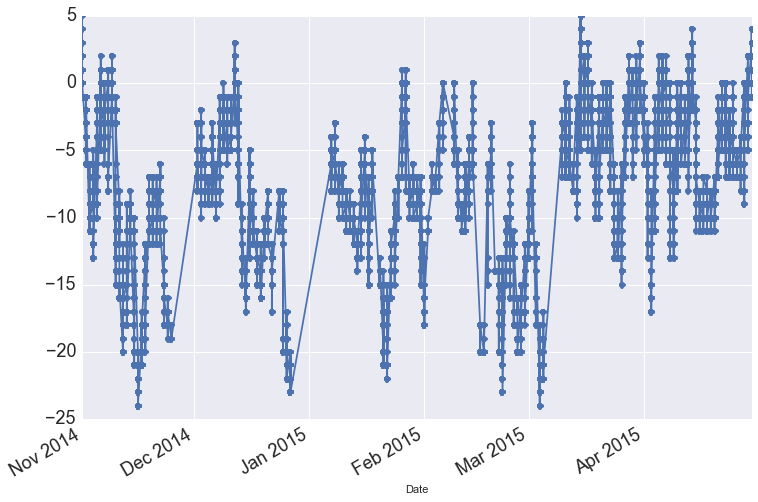

In [394]:
df_met.DryBulbCelsius.plot(marker='o')

#### Create daily max and min temp. columns

In [395]:
df_met['high_temp_C'] = df_met.DryBulbCelsius.resample(resamp_time, how=np.max)
df_met['low_temp_C'] = df_met.DryBulbCelsius.resample(resamp_time, how=np.min)

In [396]:
df_met.high_temp_C.unique()

array([  5.,  -1.,  -6.,  -5.,   2.,   0.,   1.,  -8., -12.,  -9., -10.,
       -20., -17.,  -7., -16., -18.,  -3.,  -2.,   3., -13., -11.,  -4.,
       -14., -15.,   4.])

In [397]:
df_met.drop(['DryBulbCelsius'], axis=1, inplace=True)

## Wind Speed

In [398]:
df_met.WindSpeed.unique()

array(['23', '25', '29', '17', '15', '18', '20', ' 8', '11', '  ', '16',
       '24', '21', '26', '22', ' 5', '10', ' 0', ' 6', '37', '33', '34',
       '28', '36', '14', '13', ' 7', ' 9', ' 3', '30', '38', '41', '43',
       '44', '39', '40', '31', '45', '52', '49', '46', '56', '48', '53',
       '54', '55', '51', '47', '32', '66', '59', 'M', '57', '69', '60',
       '70', '62'], dtype=object)

In [399]:
df_met.WindSpeed = df_met.WindSpeed.map(lambda x: np.nan if x == '  ' or x == 'M' else x)

In [400]:
df_met.WindSpeed = df_met.WindSpeed.map(lambda x: int(x) if type(x) == str else x)

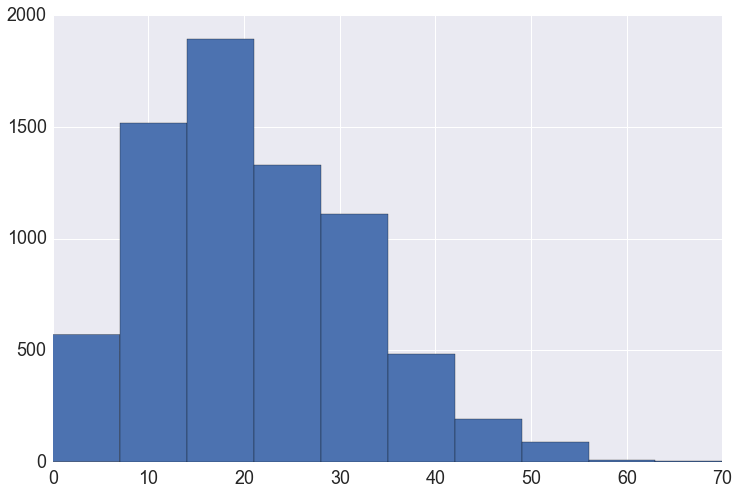

In [401]:
df_met.WindSpeed.hist()

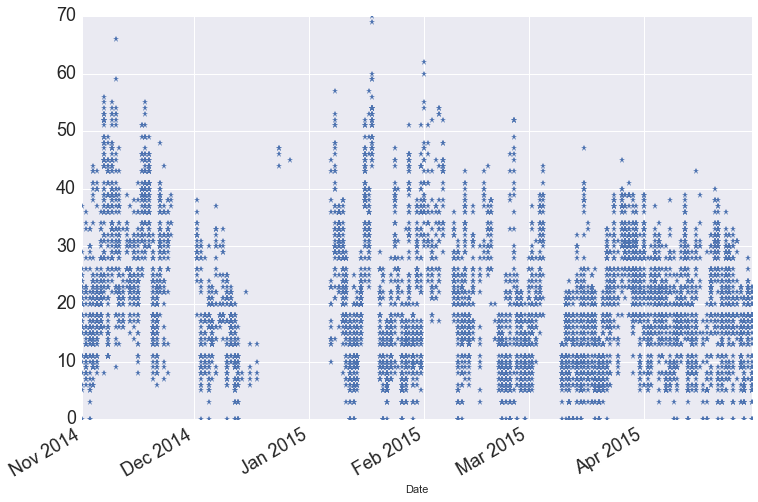

In [402]:
df_met.WindSpeed.plot(linestyle = ' ', marker = '*')

#### Create daily max and mean windspeed

In [403]:
df_met['max_windspeed'] = df_met.WindSpeed.resample(resamp_time,how=np.max)
df_met['mean_windspeed'] = df_met.WindSpeed.resample(resamp_time)

In [404]:
df_met.drop(['WindSpeed'], axis=1, inplace=True)

In [405]:
df_met.head()

,Time,Visibility,RelativeHumidity,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed
Date,,,,,,,,,,,,,,,,,,
2014-11-01,10,10,85,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027
2014-11-01,30,10,85,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027
2014-11-01,50,10,85,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027
2014-11-01,110,10,92,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027
2014-11-01,130,10,92,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027


## Relative Humidity

#### Create mean and max RH.

In [406]:
df_met.RelativeHumidity.unique()

array([' 85', ' 92', ' 89', ' 82', ' 96', ' 78', ' 88', ' 81', ' 84',
       ' 77', ' 80', ' 76', ' 83', ' 87', ' 79', ' 75', ' 74', ' 86', 'M',
       ' 72', ' 70', ' 73', ' 71', ' 68', ' 67', ' 69', ' 66', ' 64'], dtype=object)

#### Drop the non-numerical RH values.

In [407]:
df_met.RelativeHumidity = df_met.RelativeHumidity.map(lambda rh: int(rh) if  rh!='M' else np.nan)

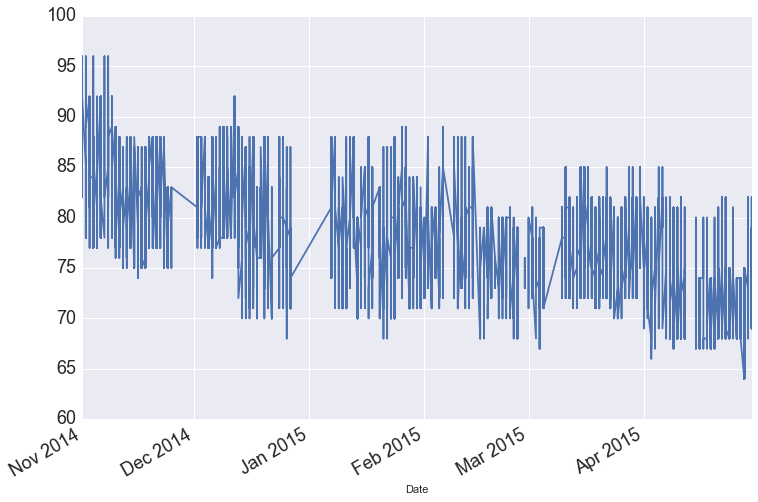

In [408]:
df_met.RelativeHumidity.plot()

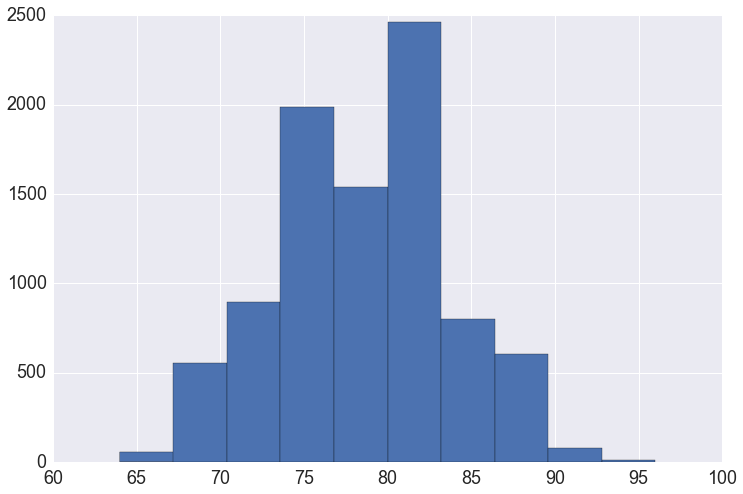

In [409]:
df_met.RelativeHumidity.hist()

In [410]:
df_met['max_rh'] = df_met.RelativeHumidity.resample(resamp_time, how=np.max)
df_met['mean_rh'] = df_met.RelativeHumidity.resample(resamp_time)

In [411]:
df_met.drop(['RelativeHumidity'], axis=1, inplace=True)

In [427]:
df_met.head()

,Time,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed,max_rh,mean_rh,mean_visibility
Date,,,,,,,,,,,,,,,,,,,
2014-11-01,10,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,30,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,50,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,110,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,130,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10


## Export Data

In [428]:
df_met.to_csv('data/all_weather_clean.csv')